In [ ]:
#hide
#conda install -n py3_10 ipykernel --update-deps --force-reinstall
!pip3 install ipywidgets
!pip3 install fastai
!pip3 install azure-cognitiveservices-search-imagesearch
!pip3 install azure-cognitiveservices-search-websearch
!pip3 install nbdev
!pip3 install graphviz

from utils import *

In [ ]:
import fastai
fastai.__version__

'2.7.10'

In [ ]:
torch.cuda.is_available()

True

# Your deep learning journey

## Deep learning is for everyone

## Neural networks: a brief history

## What you will learn

## Who we are

## How to learn deep learning

## Your projects and your mindset

## The software: PyTorch, fastai, and Jupyter (and why it doesn't matter)

## Your first model

### Getting a GPU deep learning server

### Running your first notebook

In [ ]:
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/home/shengq2/anaconda3/envs/py3_10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shengq2/anaconda3/envs/py3_10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.175309,0.012914,0.005413,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.062497,0.009441,0.004060,00:21


### Sidebar: This book was written in Jupyter Notebooks

In [ ]:
1+1

2

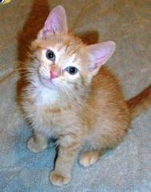

In [ ]:
img = PILImage.create('images/chapter1_cat_example.jpg')
img.to_thumb(192)

### End sidebar

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value=(), description='Upload')

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}; Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True; Probability it's a cat: 0.999981


### What is machine learning?

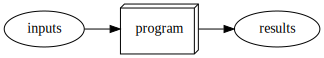

In [ ]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

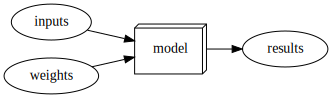

In [ ]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

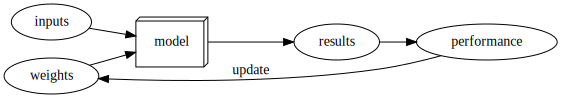

In [ ]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

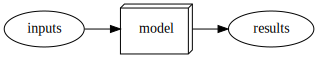

In [ ]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

### What is a neural network?

### A bit of deep learning jargon

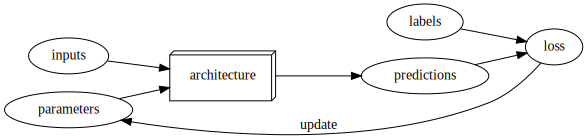

In [ ]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

### What our image recognizer did

### What our image recognizer learned

### What image recognizers can do

### A bit more jargon

## Deep learning is not just for image classification

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/home/shengq2/anaconda3/envs/py3_10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shengq2/anaconda3/envs/py3_10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,time
0,2.618305,2.254451,00:09


epoch,train_loss,valid_loss,time
0,1.661103,1.564733,00:08
1,1.427678,1.289047,00:07
2,1.347321,1.168352,00:07
3,1.230290,0.996926,00:07
4,1.105866,0.954812,00:09
5,0.999593,0.902108,00:06
6,0.910468,0.848466,00:08
7,0.842854,0.851073,00:07


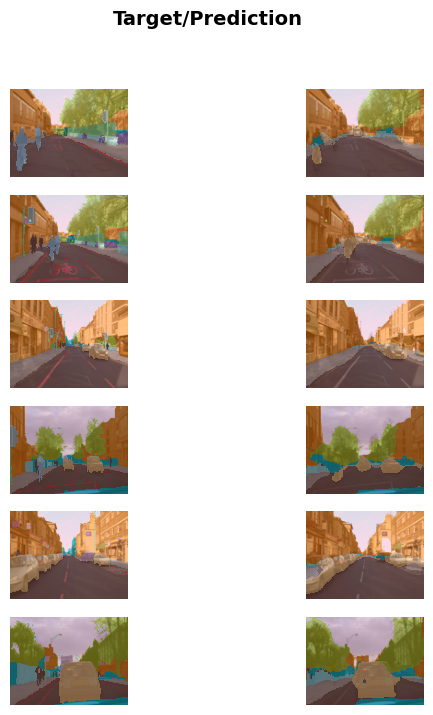

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.455255,0.419695,0.808680,01:04


epoch,train_loss,valid_loss,accuracy,time
0,0.312442,0.246559,0.901400,01:37
1,0.249003,0.254963,0.898680,01:24
2,0.184396,0.181987,0.930920,01:21
3,0.152031,0.195236,0.928360,01:21


In [ ]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([4.4389e-04, 9.9956e-01]))

### Sidebar: The order matter

### End sidebar

In [ ]:
from IPython.display import display, HTML, Markdown

In [ ]:
md = show_doc(learn.predict, renderer=BasicHtmlRenderer) 



In [ ]:
BasicHtmlRenderer??

Init signature: BasicHtmlRenderer(sym, name: 'str | None' = None, title_level: 'int' = 3)
Source:        
class BasicHtmlRenderer(ShowDocRenderer):
    "Simple HTML renderer for `show_doc`"
    def _repr_html_(self):
        doc = '<hr/>\n'
        doc += f'<h{self.title_level}>{self.nm}</h{self.title_level}>\n'
        doc += f'<blockquote><pre><code>{self.nm}{_fmt_sig(self.sig)}</code></pre></blockquote>'
        if self.docs: doc += f"<p>{self.docs}</p>"
        return doc

    def doc(self):
        "Show `show_doc` info along with link to docs"
        from IPython.display import display,HTML
        res = self._repr_html_()
        docs = NbdevLookup().doc(self.fn)
        if docs is not None: res += '\n<p>' +_html_link(docs, "Show in docs") + '</p>'
        display(HTML(res))
File:           ~/anaconda3/envs/py3_10/lib/python3.10/site-packages/nbdev/showdoc.py
Type:           type
Subclasses:     


In [ ]:
show_doc??

Signature:
show_doc(
    sym,
    renderer=None,
    name: 'str | None' = None,
    title_level: 'int' = 3,
)
Source:   
def show_doc(sym,  # Symbol to document
             renderer=None,  # Optional renderer (defaults to markdown)
             name:str|None=None,  # Optionally override displayed name of `sym`
             title_level:int=3):  # Heading level to use for symbol name
    "Show signature and docstring for `sym`"
    if renderer is None: renderer = get_config().get('renderer', None)
    if renderer is None: renderer=BasicMarkdownRenderer
    elif isinstance(renderer,str):
        p,m = renderer.rsplit('.', 1)
        renderer = getattr(import_module(p), m)
    if isinstance(sym, TypeDispatch): pass
    else:return renderer(sym or show_doc, name=name, title_level=title_level)
File:      ~/anaconda3/envs/py3_10/lib/python3.10/site-packages/nbdev/showdoc.py
Type:      function


In [32]:

md = show_doc(learn.predict, renderer=BasicHtmlRenderer)
mdstr = md._repr_html_() + f'\n\n<a href="https://dev.fast.ai/learner#Learner.predict" target="_blank" rel="noreferrer noopener">Show in docs</a>'
display(Markdown(mdstr))

<hr/>
<h3>Learner.predict</h3>
<blockquote><pre><code>Learner.predict(item, rm_type_tfms=None, with_input=False)</code></pre></blockquote><p>Prediction on `item`, fully decoded, loss function decoded and probabilities</p>

<a href="https://dev.fast.ai/learner#Learner.predict" target="_blank" rel="noreferrer noopener">Show in docs</a>

In [33]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [34]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.371330,0.363359,0.832770,00:10
1,0.362690,0.350529,0.836916,00:10
2,0.350352,0.344645,0.838759,00:11


In [35]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.502626,1.436104,00:01


epoch,train_loss,valid_loss,time
0,1.354461,1.375152,00:01
1,1.248513,1.186878,00:01
2,1.005707,0.874296,00:01
3,0.795088,0.737238,00:01
4,0.682730,0.704470,00:01
5,0.642642,0.695310,00:01
6,0.620968,0.690554,00:00
7,0.615781,0.689420,00:00
8,0.602483,0.688677,00:01
9,0.611634,0.688576,00:01


In [36]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,19.0,26.0,4.5,4.054209
1,8.0,90.0,3.0,4.375954
2,81.0,2.0,3.5,3.326896
3,48.0,25.0,2.0,3.777259
4,83.0,67.0,4.0,3.927464
5,33.0,97.0,4.0,3.907926
6,27.0,9.0,4.0,3.546902
7,45.0,38.0,2.0,3.315236
8,38.0,7.0,5.0,4.670257


### Sidebar: Datasets: food for models

### End sidebar

## Validation sets and test sets

### Use judgment in defining test sets

## A _Choose Your Own Adventure_ moment

## Questionnaire

### Further research